In [89]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
from scipy.stats import t
pd.options.mode.chained_assignment = None 
from sklearn import linear_model
%matplotlib inline

In [90]:
#SAMPLE

file_path = "C://Users//LENOVO//Downloads//STATIN_DATA//sample_wildfire_weather_data.csv"
sample = pd.read_csv(file_path)
sample

,Region,Estimated_fire_area,Temperature_Mean,WindSpeed_Mean
0,WA,639.982000,23.390953,3.551176
1,WA,593.569167,23.552620,4.091700
2,WA,37.345455,14.617797,4.637551
3,WA,544.986486,25.227217,4.334514
4,WA,35.823600,19.427573,4.840414
...,...,...,...,...
387,TA,29.795000,8.267706,1.748738
388,TA,35.423571,19.759433,3.482381
389,TA,14.536667,10.675490,2.851847
390,TA,1.000000,9.040038,3.716907


# Hubungan temperature_mean (X) dengan Estimated_fire_area (Y)

Ngikutin Tabel di pdf halaman 14 :

In [91]:
data = sample[['Temperature_Mean','Estimated_fire_area']]
pd.options.mode.chained_assignment = None  # default='warn'

data['x^2'] = data['Temperature_Mean'] ** 2
data['y^2'] = data['Estimated_fire_area'] ** 2
data['xy'] = data['Temperature_Mean'] * data['Estimated_fire_area']
sums = data.sum().to_frame().T  
sums.index = ['Σ']  
data_with_sums = pd.concat([data, sums])

data_with_sums

,Temperature_Mean,Estimated_fire_area,x^2,y^2,xy
0,23.390953,639.982000,547.136693,4.095770e+05,1.496979e+04
1,23.552620,593.569167,554.725932,3.523244e+05,1.398011e+04
2,14.617797,37.345455,213.679978,1.394683e+03,5.459083e+02
3,25.227217,544.986486,636.412463,2.970103e+05,1.374849e+04
4,19.427573,35.823600,377.430596,1.283330e+03,6.959656e+02
...,...,...,...,...,...
388,19.759433,35.423571,390.435210,1.254829e+03,6.999497e+02
389,10.675490,14.536667,113.966076,2.113147e+02,1.551860e+02
390,9.040038,1.000000,81.722282,1.000000e+00,9.040038e+00
391,17.762332,2.200000,315.500438,4.840000e+00,3.907713e+01


Rumus manual sesuai pdf halaman 14 :

In [92]:
n = len(data_with_sums) - 1  # The number of observations, excluding the sum row
sum_x = data_with_sums.iloc[-1]['Temperature_Mean']  # Σx
sum_y = data_with_sums.iloc[-1]['Estimated_fire_area']  # Σy
sum_x2 = data_with_sums.iloc[-1]['x^2']  # Σx^2
sum_y2 = data_with_sums.iloc[-1]['y^2']  # Σy^2
sum_xy = data_with_sums.iloc[-1]['xy']  # Σxy
# print(sum_x,sum_y,sum_x2,sum_y2,sum_xy) #KALAU MAU AKSES SIGMA TIAP KOLOM**
# Calculate the correlation coefficient (r)
r_numerator = (n * sum_xy) - (sum_x * sum_y) #NUMERATOR ITU PEMBILANG DI RUMUS
r_denominator = ((n * sum_x2 - sum_x**2) * (n * sum_y2 - sum_y**2))**0.5 #DENOMATOR ITU PEMBAGI DI RUMUS
r = r_numerator / r_denominator #INI KOEFISIEN KORELASINYA

# Calculate the coefficient of determination (r^2)
r_squared = r**2 #INI NILAI KOEFISIEN DETERMINASI

print(f"Koefisien Korelasi (r)      : {r} / {r*100}%\
      \nKoefisien Diterminasi (r^2) : {r_squared} / {r_squared*100}%")

Koefisien Korelasi (r)      : 0.21225676232812754 / 21.225676232812756%      
Koefisien Diterminasi (r^2) : 0.045052933154019224 / 4.505293315401922%


Pakai corr() sesuai source code :

In [93]:
data[['Temperature_Mean','Estimated_fire_area']].corr()

,Temperature_Mean,Estimated_fire_area
Temperature_Mean,1.000000,0.212257
Estimated_fire_area,0.212257,1.000000


In [94]:
# Define a function to perform the hypothesis test using the correlation coefficient and number of observations
def hypothesis_test(r, n, alpha=0.05):
    # Degrees of freedom
    df = n - 2
    # Calculate the t-statistic
    t_statistic = (r * (n - 2)**0.5) / ((1 - r**2)**0.5)
    # Calculate the critical t-value for a two-tailed test
    t_critical = t.ppf(1 - (alpha/2), df)
    # Determine if we reject the null hypothesis
    reject_null = abs(t_statistic) > t_critical
    return t_statistic, t_critical, reject_null

t_statistic_1, t_critical_1, reject_null_1 = hypothesis_test(r, n)

# Print out the results for both cases
print(f"Results for the first case (image 2):")
print(f"t-statistic / hitung: {t_statistic_1:.4f}")
print(f"t-critical value: {t_critical_1:.4f}")
print(f"Reject the null hypothesis: {reject_null_1}\n")

Results for the first case (image 2):
t-statistic / hitung: 4.2895
t-critical value: 1.9661
Reject the null hypothesis: True



Rumus model regresi nyari a dan b (PDF hal 28)

In [95]:
# Calculate the intercept (a)
a = (sum_y * sum_x2 - sum_x * sum_xy) / (n * sum_x2 - sum_x**2)

# Calculate the slope (b)
b = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
print(f"Intercept (a): {a}")
print(f"Slope (b)    : {b}")

Intercept (a): -75.94103778766463
Slope (b)    : 10.009412832305037


MODEL REGRESI MANUAL y_pred = -75.94+10(X)

PENENTUAN a, b dan model serta graph dengan library python

In [96]:

regr = linear_model.LinearRegression()
x = data['Temperature_Mean'].values.reshape(-1, 1)
y =  data['Estimated_fire_area'].values.reshape(-1, 1)
regr.fit (x,y)
# The coefficients
print ('Slope: b = ', regr.coef_)
print ('Intercept: a = ',regr.intercept_)

Slope: b =  [[10.00941283]]
Intercept: a =  [-75.94103779]


Text(0, 0.5, 'Estimated_fire_area')

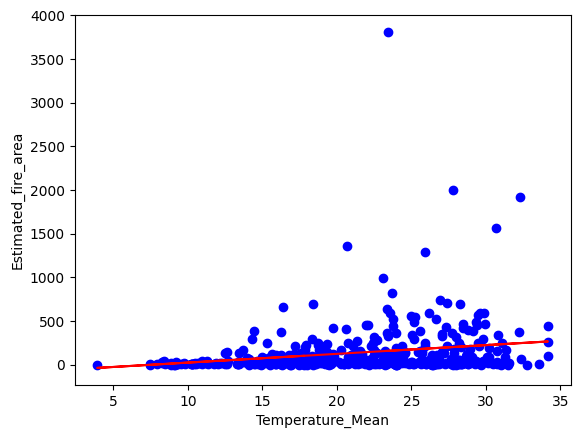

In [97]:
plt.scatter(x, y,  color='blue')
plt.plot(x, regr.coef_[0][0]*x + regr.intercept_[0], '-r')
plt.xlabel("Temperature_Mean")
plt.ylabel("Estimated_fire_area")

# Windspeed_mean (X) dengan Estimated_fire_area (Y)


Ngikutin Tabel di pdf halaman 14 :

In [98]:
data = sample[['WindSpeed_Mean','Estimated_fire_area']]
pd.options.mode.chained_assignment = None  # default='warn'

data['x^2'] = data['WindSpeed_Mean'] ** 2
data['y^2'] = data['Estimated_fire_area'] ** 2
data['xy'] = data['WindSpeed_Mean'] * data['Estimated_fire_area']
sums = data.sum().to_frame().T  
sums.index = ['Σ']  
data_with_sums = pd.concat([data, sums])

data_with_sums

,WindSpeed_Mean,Estimated_fire_area,x^2,y^2,xy
0,3.551176,639.982000,12.610848,4.095770e+05,2272.688442
1,4.091700,593.569167,16.742012,3.523244e+05,2428.707213
2,4.637551,37.345455,21.506881,1.394683e+03,173.191456
3,4.334514,544.986486,18.788009,2.970103e+05,2362.251411
4,4.840414,35.823600,23.429606,1.283330e+03,173.401050
...,...,...,...,...,...
388,3.482381,35.423571,12.126980,1.254829e+03,123.358386
389,2.851847,14.536667,8.133034,2.113147e+02,41.456356
390,3.716907,1.000000,13.815394,1.000000e+00,3.716907
391,2.908519,2.200000,8.459481,4.840000e+00,6.398741


Rumus manual sesuai pdf halaman 14 :

In [99]:
n = len(data_with_sums) - 1  # The number of observations, excluding the sum row
sum_x = data_with_sums.iloc[-1]['WindSpeed_Mean']  # Σx
sum_y = data_with_sums.iloc[-1]['Estimated_fire_area']  # Σy
sum_x2 = data_with_sums.iloc[-1]['x^2']  # Σx^2
sum_y2 = data_with_sums.iloc[-1]['y^2']  # Σy^2
sum_xy = data_with_sums.iloc[-1]['xy']  # Σxy
# print(sum_x,sum_y,sum_x2,sum_y2,sum_xy) #KALAU MAU AKSES SIGMA TIAP KOLOM**
# Calculate the correlation coefficient (r)
r_numerator = (n * sum_xy) - (sum_x * sum_y) #NUMERATOR ITU PEMBILANG DI RUMUS
r_denominator = ((n * sum_x2 - sum_x**2) * (n * sum_y2 - sum_y**2))**0.5 #DENOMATOR ITU PEMBAGI DI RUMUS
r = r_numerator / r_denominator #INI KOEFISIEN KORELASINYA

# Calculate the coefficient of determination (r^2)
r_squared = r**2 #INI NILAI KOEFISIEN DETERMINASI

print(f"Koefisien Korelasi (r)      : {r} / {r*100}%\
      \nKoefisien Diterminasi (r^2) : {r_squared} / {r_squared*100}%")

Koefisien Korelasi (r)      : 0.15277567819190982 / 15.277567819190981%      
Koefisien Diterminasi (r^2) : 0.02334040784699799 / 2.334040784699799%


Pakai corr() sesuai source code :

In [100]:
data[['WindSpeed_Mean','Estimated_fire_area']].corr()

,WindSpeed_Mean,Estimated_fire_area
WindSpeed_Mean,1.000000,0.152776
Estimated_fire_area,0.152776,1.000000


In [101]:
t_statistic_1, t_critical_1, reject_null_1 = hypothesis_test(r, n)

# Print out the results for both cases
print(f"Results for the first case (image 2):")
print(f"t-statistic / hitung: {t_statistic_1:.4f}")
print(f"t-critical value: {t_critical_1:.4f}")
print(f"Reject the null hypothesis: {reject_null_1}\n")

Results for the first case (image 2):
t-statistic / hitung: 3.0529
t-critical value: 1.9661
Reject the null hypothesis: True



Rumus model regresi nyari a dan b (PDF hal 28)

In [102]:
# Calculate the intercept (a)
a = (sum_y * sum_x2 - sum_x * sum_xy) / (n * sum_x2 - sum_x**2)

# Calculate the slope (b)
b = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
print(f"Intercept (a): {a}")
print(f"Slope (b)    : {b}")

Intercept (a): -44.650363996687524
Slope (b)    : 49.5117941855621


MODEL REGRESI MANUAL y_pred = -44.65+49.51(X)

PENENTUAN a, b dan model serta graph dengan library python

In [105]:

regr = linear_model.LinearRegression()
x = data['WindSpeed_Mean'].values.reshape(-1, 1)
y =  data['Estimated_fire_area'].values.reshape(-1, 1)
regr.fit (x,y)
# The coefficients
print ('Slope: b = ', regr.coef_)
print ('Intercept: a = ',regr.intercept_)

Slope: b =  [[49.51179419]]
Intercept: a =  [-44.650364]


Text(0, 0.5, 'Estimated_fire_area')

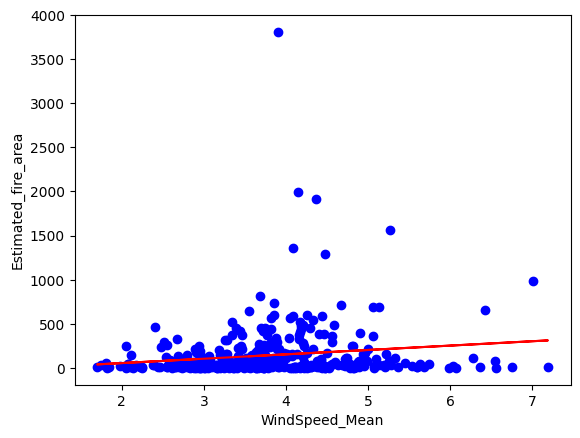

In [106]:
plt.scatter(x, y,  color='blue')
plt.plot(x, regr.coef_[0][0]*x + regr.intercept_[0], '-r')
plt.xlabel("WindSpeed_Mean")
plt.ylabel("Estimated_fire_area")